In [86]:
# A dependency of the preprocessing for BERT inputs
# !pip install -U "yfinance"

In [87]:
import yfinance as yf

# Specify the ticker symbol and the time period
ticker_symbol = "AAPL"
start_date = "2020-08-23"
end_date = "2023-08-23"

# Fetch historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [88]:
data.sample(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-16,148.440002,148.970001,147.220001,148.789993,147.088318,68034100


In [89]:
data.shape

(501, 6)

<Axes: xlabel='Date'>

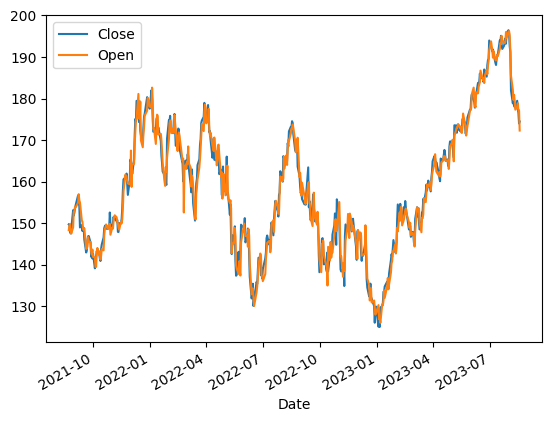

In [90]:
data.plot.line(y=['Close','Open'] , use_index = True)

In [91]:
data['Tomorrow' ] = data.Close.shift(-1)
data.dropna(inplace=True)
data[['Tomorrow' , 'Close']].head()

,Tomorrow,Close
Date,,
2021-08-23,149.619995,149.710007
2021-08-24,148.360001,149.619995
2021-08-25,147.539993,148.360001
2021-08-26,148.600006,147.539993
2021-08-27,153.119995,148.600006


In [92]:
data['Change%'] = ((data.Tomorrow - data.Close) / data.Close) * 100
data[['Tomorrow' , 'Close' , 'Change%']].head()


,Tomorrow,Close,Change%
Date,,,
2021-08-23,149.619995,149.710007,-0.060124
2021-08-24,148.360001,149.619995,-0.842130
2021-08-25,147.539993,148.360001,-0.552715
2021-08-26,148.600006,147.539993,0.718458
2021-08-27,153.119995,148.600006,3.041715


# Train Model

In [93]:
moving_averages = [2 , 5 , 60,200]

for MA in moving_averages:
    # Calculate the rolling mean (moving average) with a window size of 2
    moving_avg_close = data.Close.rolling(window=MA).mean()
    col_name = 'Moving_Ratio_'+ str(MA)
    data[col_name] = data.Close /  moving_avg_close 
    
    trend_col = 'Trend_Ratio_' + str(MA)
    data[trend_col] = data.shift(1).rolling(MA).sum()['Change%']
    

In [94]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Change%,Moving_Ratio_2,Trend_Ratio_2,Moving_Ratio_5,Trend_Ratio_5,Moving_Ratio_60,Trend_Ratio_60
Date,,,,,,,,,,,,,,
2021-08-23,148.309998,150.190002,147.889999,149.710007,147.997772,60131800,149.619995,-0.060124,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-24,149.449997,150.860001,149.149994,149.619995,147.908813,48606400,148.360001,-0.842130,0.999699,NaN,NaN,NaN,NaN,NaN
2021-08-25,149.809998,150.320007,147.800003,148.360001,146.663239,58991300,147.539993,-0.552715,0.995772,-0.902254,NaN,NaN,NaN,NaN
2021-08-26,148.350006,149.119995,147.509995,147.539993,145.852615,48597200,148.600006,0.718458,0.997229,-1.394844,NaN,NaN,NaN,NaN
2021-08-27,147.479996,148.750000,146.830002,148.600006,146.900482,55802400,153.119995,3.041715,1.003579,0.165743,0.998884,NaN,NaN,NaN


In [95]:
data = data.dropna()

In [96]:
data.shape

(440, 14)

In [97]:
data

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Change%,Moving_Ratio_2,Trend_Ratio_2,Moving_Ratio_5,Trend_Ratio_5,Moving_Ratio_60,Trend_Ratio_60
Date,,,,,,,,,,,,,,
2021-11-16,149.940002,151.490005,149.339996,151.000000,149.490891,59256200,153.490005,1.649010,1.003322,0.673330,1.011007,0.156907,1.021296,1.290110
2021-11-17,151.000000,155.000000,150.990005,153.490005,151.956024,88807000,157.869995,2.853599,1.008178,2.315677,1.020070,3.722235,1.037685,2.999244
2021-11-18,153.710007,158.669998,153.050003,157.869995,156.292206,137827700,160.550003,1.697604,1.014067,4.502609,1.035417,6.609638,1.066154,6.694973
2021-11-19,157.649994,161.020004,156.529999,160.550003,158.945450,117305600,161.020004,0.292744,1.008417,4.551204,1.038607,6.873544,1.082667,8.945292
2021-11-22,161.679993,165.699997,161.000000,161.020004,159.410767,117467900,161.410004,0.242206,1.001462,1.990349,1.027005,7.159625,1.084323,8.519579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-11,177.320007,178.619995,176.550003,177.789993,177.789993,51988100,179.460007,0.939318,0.999494,-0.224610,0.995911,-2.314249,0.959678,3.634471
2023-08-14,177.970001,179.690002,177.309998,179.460007,179.460007,43675600,177.449997,-1.120032,1.004675,0.838173,1.004579,0.350438,0.968103,4.213474
2023-08-15,178.880005,179.479996,177.050003,177.449997,177.449997,43622600,176.570007,-0.495909,0.994368,-0.180714,0.995948,-1.300763,0.957053,1.726830


In [98]:
X = data.drop(['Change%'] , axis = 1)
y = data['Change%']


In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X , y , test_size = 0.3)

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rf = RandomForestRegressor(n_estimators = 100 , min_samples_split = 100)
rf.fit(x_train  , y_train)

RandomForestRegressor(min_samples_split=100)

In [102]:
y_pred = rf.predict(x_test )

In [110]:
def func(y_pred):
    return  0 if y_pred < 0 else 1
y_pred = list(map(lambda y_pred : func(y_pred)  , y_pred))
y_test = list(map(lambda y_test : func(y_test)  , y_test))

# y_test = y_test.apply(lambda x : 0 if x < 0 else 1)


In [112]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test , y_pred))

[[37 26]
 [38 31]]


In [113]:
y_pred[:5]

[0, 0, 0, 0, 1]